<h2>K Nearest Neighbors (KNN)</h2>
The k-NN algorithm is a type of instance-based learning, where the model makes predictions based on the similarity between data points. It is a non-parametric method, meaning it does not make any assumptions about the underlying data distribution.

<h4>How KNN Works</h4>

1. Data Representation:
    - Each data point is represented in an n-dimensional feature space. For example, if we are classifying fruits based on color and size, each fruit is a point in a 2-dimensional space.

2. Choosing k:
    - The parameter 𝑘 represents the number of nearest neighbors to consider when making a prediction. Choosing the right 𝑘 is crucial for the performance of the algorithm.

3. Distance Metric:
    - To find the nearest neighbors, the algorithm calculates the distance between points using a distance metric, such as Euclidean distance, Manhattan distance, or others. For example, Euclidean distance between two points $(x_1, y_1)$ and $(x_2, y_2)$ is calculated as:
$$
    d = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}
$$

4. Finding Nearest Neighbors:
    - For a given query point (the point we want to classify or predict), the algorithm finds the 
    𝑘 data points in the training set that are closest to the query point based on the chosen distance metric.

5. Making Predictions:

    - Classification: For classification tasks, the algorithm assigns the class label that is most common among the 𝑘 nearest neighbors. This is typically done using a majority vote.

    - Regression: For regression tasks, the algorithm predicts the value based on the average (or weighted average) of the values of the 𝑘 nearest neighbors.

<h4>Importing libraries</h4>

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<h4>Loading dataset</h4>

In [13]:
from sklearn.datasets import load_iris

X = load_iris().data
y = load_iris().target

<h4>Splitting data</h4>

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

In [15]:
print(X_train)

[[4.9 3.1 1.5 0.1]
 [5.2 2.7 3.9 1.4]
 [5.4 3.9 1.3 0.4]
 [7.7 2.8 6.7 2. ]
 [5.  3.4 1.5 0.2]
 [5.4 3.9 1.7 0.4]
 [6.5 2.8 4.6 1.5]
 [5.  2.3 3.3 1. ]
 [5.7 3.  4.2 1.2]
 [6.3 3.3 6.  2.5]
 [6.9 3.2 5.7 2.3]
 [4.8 3.4 1.9 0.2]
 [5.5 2.4 3.7 1. ]
 [4.6 3.2 1.4 0.2]
 [6.3 2.3 4.4 1.3]
 [6.3 2.5 5.  1.9]
 [4.9 2.5 4.5 1.7]
 [7.9 3.8 6.4 2. ]
 [4.9 3.1 1.5 0.2]
 [5.7 2.8 4.1 1.3]
 [7.4 2.8 6.1 1.9]
 [6.2 3.4 5.4 2.3]
 [5.5 4.2 1.4 0.2]
 [6.1 2.6 5.6 1.4]
 [5.4 3.  4.5 1.5]
 [7.  3.2 4.7 1.4]
 [7.7 3.8 6.7 2.2]
 [5.9 3.  4.2 1.5]
 [5.  3.6 1.4 0.2]
 [6.5 3.2 5.1 2. ]
 [6.7 3.  5.  1.7]
 [4.7 3.2 1.6 0.2]
 [5.8 2.6 4.  1.2]
 [5.1 3.3 1.7 0.5]
 [6.4 2.8 5.6 2.1]
 [5.5 2.3 4.  1.3]
 [6.8 2.8 4.8 1.4]
 [6.4 2.8 5.6 2.2]
 [5.8 2.8 5.1 2.4]
 [6.3 2.5 4.9 1.5]
 [4.9 3.6 1.4 0.1]
 [5.  3.4 1.6 0.4]
 [6.3 3.4 5.6 2.4]
 [4.9 3.  1.4 0.2]
 [4.8 3.4 1.6 0.2]
 [6.8 3.  5.5 2.1]
 [5.8 2.7 5.1 1.9]
 [5.5 2.5 4.  1.3]
 [4.4 2.9 1.4 0.2]
 [5.6 3.  4.1 1.3]
 [6.4 2.7 5.3 1.9]
 [6.2 2.2 4.5 1.5]
 [6.5 3.  5.

In [16]:
print(X_test)

[[6.9 3.1 5.4 2.1]
 [7.2 3.2 6.  1.8]
 [5.8 2.7 4.1 1. ]
 [4.6 3.1 1.5 0.2]
 [5.7 2.5 5.  2. ]
 [6.9 3.1 4.9 1.5]
 [5.7 3.8 1.7 0.3]
 [6.4 3.1 5.5 1.8]
 [5.4 3.4 1.7 0.2]
 [5.6 2.9 3.6 1.3]
 [6.1 2.8 4.7 1.2]
 [4.8 3.1 1.6 0.2]
 [7.1 3.  5.9 2.1]
 [5.1 3.8 1.5 0.3]
 [5.4 3.7 1.5 0.2]
 [6.3 2.8 5.1 1.5]
 [6.4 3.2 4.5 1.5]
 [6.1 2.9 4.7 1.4]
 [7.7 3.  6.1 2.3]
 [5.2 3.4 1.4 0.2]
 [6.4 3.2 5.3 2.3]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.7 3.2 1.3 0.2]
 [6.7 3.1 5.6 2.4]
 [5.1 3.5 1.4 0.3]
 [5.1 3.8 1.9 0.4]
 [6.2 2.8 4.8 1.8]
 [6.6 3.  4.4 1.4]
 [5.6 2.5 3.9 1.1]]


In [17]:
print(y_train)

[0 1 0 2 0 0 1 1 1 2 2 0 1 0 1 2 2 2 0 1 2 2 0 2 1 1 2 1 0 2 1 0 1 0 2 1 1
 2 2 1 0 0 2 0 0 2 2 1 0 1 2 1 2 2 1 0 1 2 2 1 0 1 1 1 2 1 1 2 2 2 0 2 1 0
 2 2 0 1 1 2 0 0 1 0 1 1 0 2 1 1 0 2 1 2 2 1 0 0 2 2 1 0 2 1 2 1 0 0 0 2 0
 0 2 0 1 0 1 0 0 1]


In [18]:
print(y_test)

[2 2 1 0 2 1 0 2 0 1 1 0 2 0 0 2 1 1 2 0 2 0 0 0 2 0 0 2 1 1]


<h4>Training the model</h4>

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

<h4>Visualising results</h4>

C:\Users\mike3\AppData\Local\Temp\ipykernel_20392\458552280.py:4: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_test[i][0], X_test[i][1], c = ListedColormap(("red", "green", "blue"))(y_pred[i]))


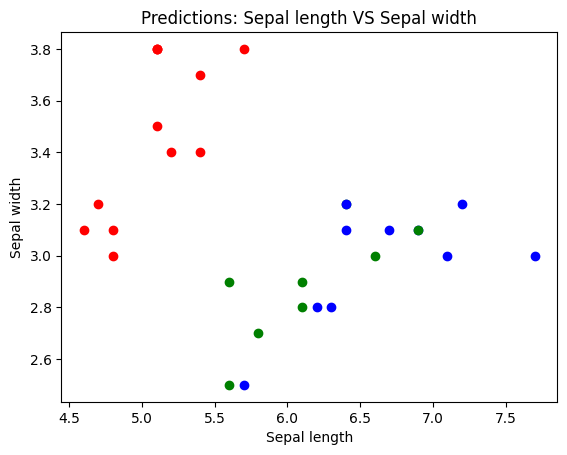

In [20]:
from matplotlib.colors import ListedColormap

for i in range(len(y_pred)):
    plt.scatter(X_test[i][0], X_test[i][1], c = ListedColormap(("red", "green", "blue"))(y_pred[i]))


plt.title("Predictions: Sepal length VS Sepal width")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.show()

C:\Users\mike3\AppData\Local\Temp\ipykernel_20392\2965732401.py:4: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_test[i][2], X_test[i][3], c = ListedColormap(("red", "green", "blue"))(y_pred[i]))


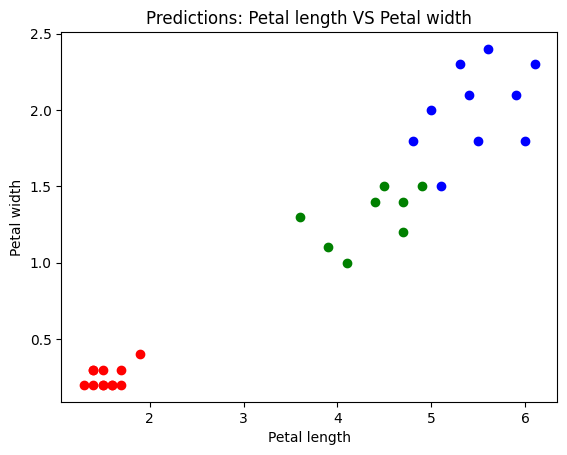

In [21]:
from matplotlib.colors import ListedColormap

for i in range(len(y_pred)):
    plt.scatter(X_test[i][2], X_test[i][3], c = ListedColormap(("red", "green", "blue"))(y_pred[i]))


plt.title("Predictions: Petal length VS Petal width")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.show()

In [22]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

1.0
